<a href="https://colab.research.google.com/github/istiaqahmedfahim/restart_2022/blob/main/Simple_CNN_on_Fashion_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as ts
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

In [2]:
data = keras.datasets.fashion_mnist
(train_images,train_label),(test_images,test_data)= data.load_data()

train_label 0

image pixel array: 
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153

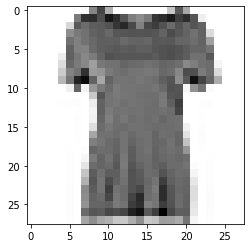

In [3]:
index = 10
np.set_printoptions(linewidth=320)
print(f'train_label {train_label[index]}')
print(f'\nimage pixel array: \n{train_images[index]} ')
plt.imshow(train_images[index],cmap='Greys')
plt.show()

In [5]:
normalized_train_images=train_images/255.0;
normalized_test_images=test_images/255.0;
cloths_name = ['tshirt','trouser','pull_over','dress','coat','sandal','shirt','sneaker','bag','ankle_boot']

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(normalized_train_images,train_label,epochs=15)
test_loss,test_accuracy = model.evaluate(normalized_test_images,test_data)
print(f'Tested_accuracy:{test_accuracy}')

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4947 - accuracy: 0.8244
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3765 - accuracy: 0.8642
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3382 - accuracy: 0.8768
Epoch 4/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3135 - accuracy: 0.8854
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2945 - accuracy: 0.8911
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2823 - accuracy: 0.8946
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2682 - accuracy: 0.9010
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2586 - accuracy: 0.9044
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2475 - accuracy: 0.9072
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

313/313 [==============================] - 1s 2ms/step


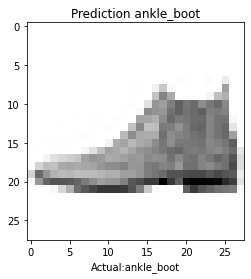

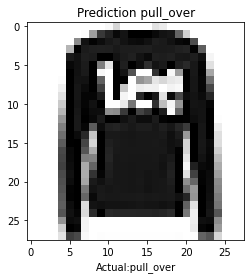

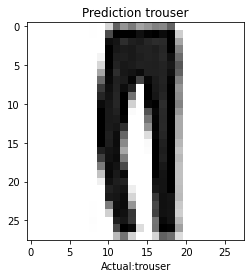

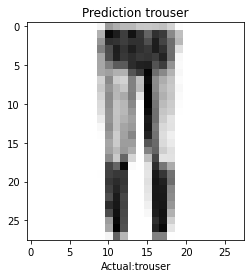

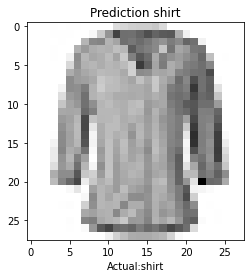

In [17]:
prediction = model.predict(normalized_test_images)

for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i],cmap='Greys')
  plt.xlabel("Actual:"+cloths_name[test_data[i]])
  plt.title("Prediction " + cloths_name[np.argmax(prediction[i])])
  plt.show()